<a href="https://colab.research.google.com/github/jsilveira1409/CIVIL-459-Animal-Pose-Estimation/blob/sda-dev/openpifpaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
!pip3 install openpifpaf

import openpifpaf
import IPython
from openpifpaf.transforms import Crop
from PIL import Image
import gdown
import subprocess
openpifpaf.show.Canvas.show = True
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\osour\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Dataset download and manipulation

In [ ]:
!rm -rf plugins
!rm -rf openpifpaf_animalplugin
!git clone --branch sda-dev https://github.com/jsilveira1409/CIVIL-459-Animal-Pose-Estimation.git plugins
!mv plugins/openpifpaf_animalplugin/ openpifpaf_animalplugin
!mv plugins/coco_adapt.py coco_adapt.py
!rm -rf data-animalpose/
!mkdir data-animalpose
!gdown "https://drive.google.com/drive/folders/1xxm6ZjfsDSmv6C9JvbgiGrmHktrUjV5x" -O data-animalpose --folder 
!unzip data-animalpose/images.zip -d data-animalpose/
!rm data-animalpose/images.zip

from openpifpaf_animalplugin import AnimalPoseEstimation
from openpifpaf_sdaplugin import SDA
import coco_adapt as coco_adapt


In [ ]:
coco_adapt.adapt_to_coco()
config = openpifpaf.plugin.register()
openpifpaf.DATAMODULES

# Animal Pose Estimation Dataset and Plugin

In [ ]:
dataset = AnimalPoseEstimation()

# Semantic Data Augmentation

In [ ]:
sda = SDA(output_dir='data-animalpose/sda')

sda(dataset[0][0], dataset[0][1])

# Training

In [ ]:
!python3 -m openpifpaf.train \
    --dataset custom_animal \
    --basenet=shufflenetv2k30 \
    --lr=0.00002 \
    --momentum=0.95 \
    --epochs=50 \
    --lr-decay 160 260 \
    --lr-decay-epochs=10  \
    --weight-decay=1e-5 \
    --weight-decay=1e-5 \
    --val-interval 10 \
    --loader-workers 2 \
    --batch-size 5

In [ ]:
import zipfile
from google.colab import drive, files
import os

# create a zip file of the folder you want to save
folder_path = '/outputs'
zip_path = '/content/myfolder.zip'
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file))

# save the zip file to your Google Drive
drive_path = '/content/drive/My Drive/myfolder.zip'
!cp '{zip_path}' '{drive_path}'

# Prediction

INFO:__main__:neural network device: cpu (CUDA available: False, count: 0)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cpu (CUDA available: False, count: 0)
src\openpifpaf\csrc\src\cif_hr.cpp:102: UserInfo: resizing cifhr buffer
src\openpifpaf\csrc\src\occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [11]
INFO:openpifpaf.predictor:batch 0: data-animalpose/images/2007_003022.jpg
Figure(1000x666)
INFO:__main__:neural network device: cpu (CUDA available: False, count: 0)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
I

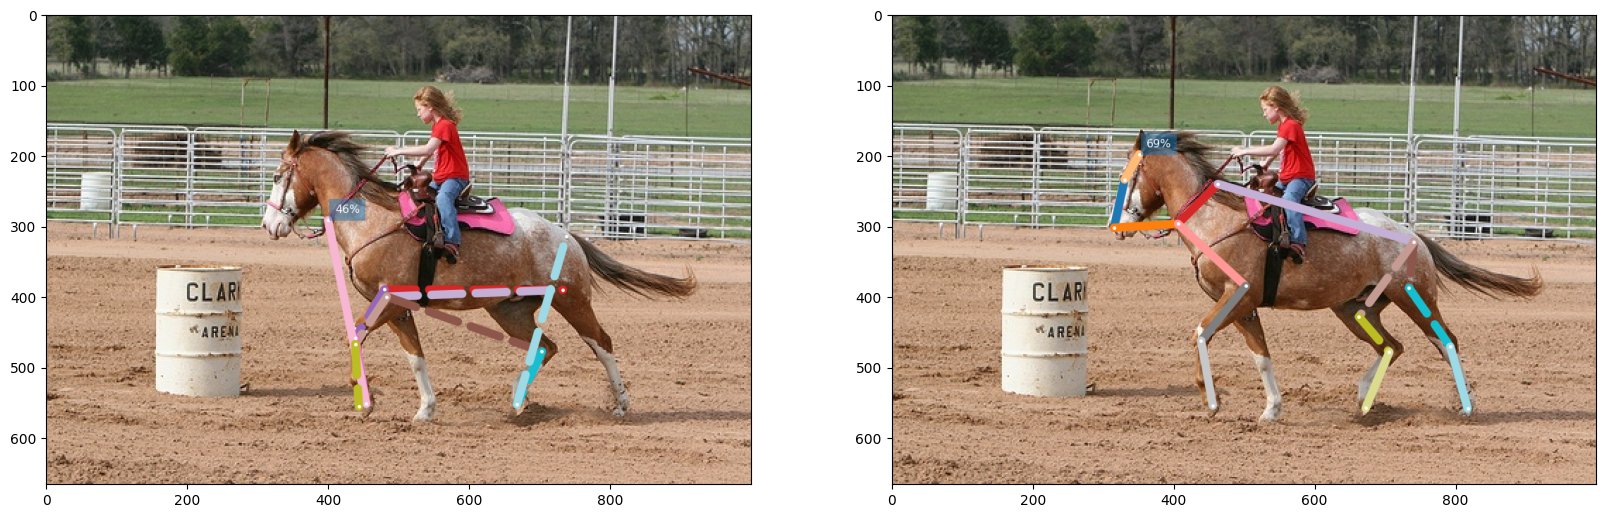

In [41]:
!python3 -m openpifpaf.predict data-animalpose/images/2007_003022.jpg \
    --checkpoint shufflenetv2k30-230425-083939-custom_animal.pkl    \
    --show \
    --image-output output1

!python3 -m openpifpaf.predict data-animalpose/images/2007_003022.jpg \
    --checkpoint shufflenetv2k30-animalpose   \
    --show \
    --image-output output2

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(mpimg.imread('output1.png'))
axs[1].imshow(mpimg.imread('output2.png'))
    